# Pooling

Convolutional neural nets make use of pooling to shrink images and reduce the number of computations required. 

Pooling layers aggregate the inputs using a function like max or min. 

The pooling below uses a 2\*2 filter to reduce the imagesize by a factor of two in each dimension (not the channels).

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
def pool_image(image, pool_agg = 'max'):
    
    height, width, channels = image.shape
    im_reshape = image.reshape(1, height, width, channels)
    
    X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
    
    if pool_agg == 'max':    
        pool = tf.nn.max_pool(X, ksize = [1,2,2,1], strides = [1,2,2,1], padding='VALID')
    elif pool_agg == 'avg':
        pool = tf.nn.avg_pool(X, ksize = [1,2,2,1], strides = [1,2,2,1], padding='VALID')
    with tf.Session() as sess:
        output = sess.run(pool, feed_dict={X:im_reshape})
        
    return output[0,:,:,0]

In [8]:
cat = mpimg.imread(r"C:\Users\James\Pictures\Cat.jpg")
dog = mpimg.imread(r"C:\Users\James\Pictures\dog.jpeg")

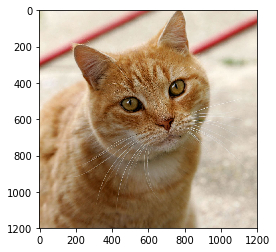

In [11]:
plt.imshow(cat);

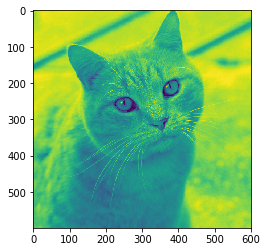

In [19]:
plt.imshow(pool_image(cat));

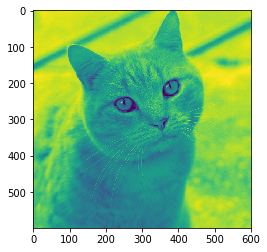

In [17]:
plt.imshow(pool_image(cat, pool_agg='avg'));

In [20]:
pool_image(cat, pool_agg='avg').sum()

63217328.0

In [21]:
pool_image(cat).sum()

64165600.0